### Natural Language Processing

- Natural Language Processing or NLP for short refers to a branch of Computer Science (to be more specific it is a branch of Artificial Intelligence or AI) where computers can understand text or spoken word in the same way humans can.
- NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.
- We will make use of the following libraries:
    - **sklearn**
    - **nltk**
- Real world applcations include:
    - machine translation
    - spam detection
    - text summarisation
    - chatbots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from string import punctuation
from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression

from sklearn import svm
from sklearn.utils import shuffle

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [2]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- t = term which is being considered
- n = total number of documents available
- tf(t) = No. of times term ‘t’ occurs in a document
- idf(t) = log e [ (1+n) / ( 1 + df(t) ) ] + 1 (default i:e smooth_idf = True)
- tf-idf = tf(t) * idf(t)
- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [3]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [4]:
df = pd.read_csv('Reviews.csv')

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.iloc[0]['Text']

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [8]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [9]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [10]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
314064,314065,B0018AHWLG,A2TI40FPAYM8P7,"Lindsey Olson ""Living Unrefined""",0,0,2,1304985600,blue is not true to color!,"I ordered the blue non pareils, and they were ..."
30833,30834,B007M83302,A3IUW081KXD3PE,pixels and bits,0,0,5,1330905600,Love the original - not so much the jalapeno o...,We've re-ordered the original potato Popchips ...
85164,85165,B004TI4SIE,A2VNKRKWWVD0R0,Someinterwebguy,0,0,5,1349568000,"Strong, but good",I ordered this product after a friend of my mo...
37738,37739,B000FVXMUY,A3RK5I0EFJU2IO,durtro,11,14,1,1239926400,Beware...,My wife and I have purchased J. LeBlanc Champa...
540779,540780,B004DDFH0I,A2BSNVWUCO9MBU,Ira Hart,0,0,2,1344643200,Amazon boxes did not taste good,We bought these In a store in NYC and loved th...


In [11]:
corpus_2 = ['Hello the fox jumped over the lazy dog',
'hello the fox jumped over the lazy dog.']

In [12]:
print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus_2)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names()).to_string())

Using count vectorizer
   dog  fox  hello  jumped  lazy  over  the
0    1    1      1       1     1     1    2
1    1    1      1       1     1     1    2


### Preprocessing
Remove all nutral scores and seperate the remaning into positive = 1 and negative = 0 Preprocessing ususally involves:

- Removing additional white spaces
- Replacing emoji's with a word representation for example :) ==> smile
- Removing links from the corpus
- Removing punctuation
- Removing HTML tags
- Remove duplicate reviews
- Here are a good links on how to process text, clean text

**For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**

After the text is 'clean' we will use sklearn.

In [13]:
df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)

In [14]:
X.head(5)

314064    I ordered the blue non pareils, and they were ...
30833     We've re-ordered the original potato Popchips ...
85164     I ordered this product after a friend of my mo...
37738     My wife and I have purchased J. LeBlanc Champa...
540779    We bought these In a store in NYC and loved th...
Name: Text, dtype: object

- Let us attempt to convert all the text in X to lowercase only.

In [15]:
X.str.lower()

314064    i ordered the blue non pareils, and they were ...
30833     we've re-ordered the original potato popchips ...
85164     i ordered this product after a friend of my mo...
37738     my wife and i have purchased j. leblanc champa...
540779    we bought these in a store in nyc and loved th...
                                ...                        
220696    not pleased at all. when i opened the box, mos...
389046    worse clam chowder mix ever!  it is just a pot...
49324     omg these things are addictive. i love them an...
98042     this review will make me sound really stupid, ...
321780    i'm glad i tried out the chocolate dreams befo...
Name: Text, Length: 164074, dtype: object

In [16]:
def convert_to_lowercase(text):
    return text.lower()

X_lowercase = X.apply(convert_to_lowercase)

In [17]:
X_lowercase

314064    i ordered the blue non pareils, and they were ...
30833     we've re-ordered the original potato popchips ...
85164     i ordered this product after a friend of my mo...
37738     my wife and i have purchased j. leblanc champa...
540779    we bought these in a store in nyc and loved th...
                                ...                        
220696    not pleased at all. when i opened the box, mos...
389046    worse clam chowder mix ever!  it is just a pot...
49324     omg these things are addictive. i love them an...
98042     this review will make me sound really stupid, ...
321780    i'm glad i tried out the chocolate dreams befo...
Name: Text, Length: 164074, dtype: object

In [18]:
y.head(5)

314064    0
30833     1
85164     1
37738     0
540779    0
Name: Score, dtype: int64

In [19]:
y.value_counts()

0    82037
1    82037
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [277]:
from sklearn.metrics import confusion_matrix

def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1_score_value = f1_score(y_test, y_pred)
    print ('Model Recall: {}'.format(recall))
    print ('Model Accuracy: {}'.format(accuracy))
    print ('Model F1 Score: {}'.format(f1_score_value))
    if coef_show == 1:
        print(confusion_matrix(y_test, y_pred))
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Defn: N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). Taken from [here](http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html).

In [278]:
c = CountVectorizer(stop_words = 'english')
text_fit(X, y, c, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.9031786271450858
Model Accuracy: 0.9026304883102952
Model F1 Score: 0.9026945378355992
[[18499  2008]
 [ 1986 18526]]

-Top 20 positive-
         Word  Coefficient
   pleasantly     2.875999
     downside     2.721208
     drawback     2.501137
    alternate     2.429679
      worries     2.396946
    skeptical     2.343775
       hooked     2.306791
     terrific     2.258932
    addicting     2.240338
     tastiest     2.205700
      welcome     2.194390
    delighted     2.188042
       resist     2.184319
    delicious     2.133288
     soothing     2.057596
      worried     2.016649
          met     1.981074
        penny     1.935153
  substitutes     1.919089
deliciousness     1.902698

-Top 20 negative-
         Word  Coefficient
         alas    -2.000885
  unappealing    -2.019408
   overpowers    -2.023489
         lame    -2.052719
     refunded    -2.062688
       bummer    -2.161501
      ex

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [279]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.8998634945397815
Model Accuracy: 0.9030205514517663
Model F1 Score: 0.9027241160072381
[[18583  1924]
 [ 2054 18458]]

-Top 20 positive-
      Word  Coefficient
     great    11.199308
 delicious    10.541098
      best     9.491279
   perfect     9.221737
 excellent     7.931535
     loves     7.838631
    highly     7.718184
      love     6.995215
 wonderful     6.779076
   amazing     6.736895
      good     6.348390
   awesome     6.262260
      nice     6.121347
  favorite     6.041019
    hooked     5.933705
     yummy     5.861798
      glad     5.640179
   pleased     5.477990
refreshing     5.414186
    smooth     5.350385

-Top 20 negative-
          Word  Coefficient
         sorry    -5.421408
      thinking    -5.446360
         money    -5.468640
    disgusting    -5.711090
        hoping    -5.721301
         waste    -5.820231
         stale    -5.859962
         threw    -5.862442
       t

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [280]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Recall: 0.9121977379095164
Model Accuracy: 0.9165264877252005
Model F1 Score: 0.916172942270969
[[18884  1623]
 [ 1801 18711]]

-Top 20 positive-
            Word  Coefficient
           great    17.068775
       delicious    14.288141
            best    13.998014
         perfect    12.205788
           loves    11.070601
            love    10.919196
       excellent    10.208029
            good     9.319964
       wonderful     9.141942
        favorite     8.912672
            nice     8.869322
         amazing     7.970766
            easy     7.817202
         awesome     7.468657
          highly     7.344558
           tasty     7.254625
           happy     7.073977
           yummy     6.899541
          smooth     6.719757
highly recommend     6.622534

-Top 20 negative-
          Word  Coefficient
         china    -6.181449
         threw    -6.606483
        hoping    -6.658655
         waste    -6.754018
         maybe    -6.788529
disappointment    -6.976001
   

There are quite a few features in our bag of words, more than 100 thousand! We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function. SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

In [52]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(f_regression, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [53]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 25, 1)

# features before applying select percentile: 1932701


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass percentile=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# features after applying select percentile: 483175
# train records: 123055
# test records: 41019


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Recall: 0.9127582017010936

-Top 20 positive-
               Word  Coefficient
    house genuinely    17.141704
                900    14.008422
          child age    13.913082
       produce food    12.448542
   defeated concept    11.113630
 ingredient gummies    10.900023
   hooked delicious    10.165959
        tea england     9.401815
     lighter creamy     9.214232
     calls addition     9.011083
       disputed way     8.740762
    forward special     7.797576
       results poor     7.711322
        tasty pasta     7.600721
 monosaccharides br     7.241321
        clumps fall     7.226030
     adjacent soils     6.958082
phenomenal customer     6.564739
       lid annoying     6.524284
  stopped overnight     6.501126

-Top 20 negative-
                Word  Coefficient
            cap like    -6.570203
    beverage lightly    -6.602245
      vacation fruit    -6.747825
     peppermint list    -6.855648
   strongest boldest    -6.865625
      powdery chalky    -7.51015

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [281]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [282]:
documents = list(X)[0:10000]
print(len(documents))

10000


In [285]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [286]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [287]:
no_topics = 5

In [288]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [289]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
br water box ingredients sugar products make chicken review amazon


thank you for fast delivery<br />I did not open it yet<br />but I know i like this stuff a lot very very taste<br />good thing the expire date is until may 2012<br />I like that...<br />so I think it is OK<br /><br />yesterday when i tried to cancel it<br />after I read other person's review<br />I hardly get throw so i was a little had a bad feeling about the site<br />so i thought i wanted to return but i will keep it<br /><br />anyhow<br />It is Hot here in Florida<br />and they sent it very fast<br />Delivery man who works hard too<br />so I will keep this stuff.<br /><br />thank you


Haven't tried this batch, but Tetley<br />is the best for me.  Like it w/o the<br />bag strings., and it's strength.<br /><br />Wish Amazon could get straight on<br />deliveries here in Hoodsport.<br />Somehow Amazon and the USPS can't<br />get together as to how to make a<br />quick smooth shipment and quick<

In [290]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [291]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
br food dog china seeds formula products toy treats dogs


My dog Brooklyn loves this doggie chew.  He's now master it, and it would take him about 10 minutes to take it apart.<br /><br />As a CAUTION, these rings must be used with the Busy Buddy Toy.  Dogs can swallow this ring as a whole and it can lodge into the esophagus or intestine.


This treat is made in China and I have been made aware the the FDA is still investigating why this product has caused kidney failure and subsequent death in dogs. No more products made in China for my beloved pets!


With the increasing number of dogs ill with kidney and liver disease related to treats made in China, my vet has taken our SCWT off all treats made in China.  Since then his liver and kidney enzymes have returned to normal.  We are sticking to made in the USA natural and organic treats.


Unfortunately, Made in China. I do not trust their manufacturing standards.  Looking for an alternative....


Topic 1:
food b

In [292]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [293]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
br like food just product taste coffee good tea flavor


I must admit, I haven't gotten many gift baskets in my time. If this one is any indication of what a gift basket is like, Iam not missing anything!!!!<br /><br />To start with, the gift basket is wrapped in cellophane, with a wide dark brown ribbon, with a sticker that says Back Mountain Gift Baskets.  The basket looks like a generic, cheap looking Easter basket, with two handles, one on each side of the basket.  Iam not sure what they are made of.  Inside where the items are, they are nestled in what looks like straw.<br /><br />Now, on to the items inside.<br /><br />1.  A wrapped box that says Kenzi All Natural Dark Napolitans.  Inside that is a box of Raisinettes.  Inside of that is 6 individual, small, solid dark chocolate, thin, red  wrapped bars, which had a gray tinge to them.<br /><br />2.  Next was a wrapped Chocolate Chip Crispie Marshmallow Bar it said on the package.  Inside was a box of Goya

### WordCloud

In [294]:
from wordcloud import WordCloud, STOPWORDS

In [55]:
plt.rcParams['font.size']=12                 
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 

In [56]:
def print_cloud(data):
    wordcloud = WordCloud(
              background_color='white',
              max_words=200,
              max_font_size=40, 
              random_state=42
             ).generate(str(data))
    
    return wordcloud

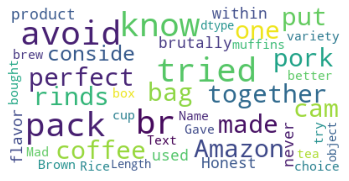

In [57]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)